# This is a large title

## This is smaller

To put in list 
* First thing
* Second thing
    - Nested

If I refer to the `PsrSigSim`. And if I want to write a code block then :
``` Python
class My_Class():
    def __init__(self):
        self.p=print('This string')
```

# Pulsar Signal Simulater: Simulation Class Tutorial

This notebooke is a tutorial that teaches how to use the new simulation class, within the Pulsar Signal Simulator, to to simulate observing runs. 

### Loading the simulator

The first thing to do is to load the Simulator. To load the simulator you will need to use the code below:
``` Python
import sys
sys.path.append('/file/path/to/PsrSigsim/')
import psrsigsim as PSS```
Run the cell below with the filepath to `PsrSigSim` within `VersionZeroPointZero`.


In [3]:
%load_ext autoreload
%autoreload 2
#import sys
#sys.path.append('/Users/jacobhesse/Documents/Bothell/pulsar_sim/VersionZeroPointZero/')
import psrsigsim as PSS


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
PSS.scintillate()

### Setting up a dictionary of parameters

The simulation class works by taking, as input, a dictionary of parameters or a pulsar name and a smaller dictionary of parameters. The next thing to do is to set up the dictionary of parameters that is needed for the simulation. Below is an example dictionary for a basic simulation that only uses the signal and pulsar classes.

In [2]:
test_dict = {}
test_dict['f0'] = 1400
test_dict['bw'] =400
test_dict['Nf'] = 50
test_dict['data_type']='int8'
test_dict['SignalType'] = "intensity"
test_dict['freq_band'] = 1400
test_dict['ObsTime'] = 10
test_dict['flux'] = 3
test_dict['f_samp'] = 4
test_dict['radiometer_noise'] =  False

## Using the simulator with a pulsar name

The simulator works by calling the simulator and inputting a handful of variables. The three main variables are the pulsar name, the telescope name, and the parameter dictionary. The other two variables, `sim_telescope` and `sim_ism` will be discussed later. 

The first command in creating a simulation is calling the `Simulation` class. Doing this sets the pulsar name, telescope name, and the dictionary of parameters that will be used by the methods within the class.

In [3]:
s1 =  PSS.Simulation(psr =  'J1713+0747' , sim_telescope= 'GBT',sim_ism= None, sim_scint= None, sim_dict = test_dict,)

INFO: Using ICRS equatorial coordinate. The parameter KOM is measured respect to equatorial North. [pint.models.binary_ddk]
Five warnings should appear. Warnings that are normal are: Unrecognized parfile line "SOLARN0", "T2CMETHOD", "MODE", "INFO -f". Warning about "DDK model" is also normal.  


When the `Simulation` class is called with a specfic pulsar name as input, the simulator automatically initializes the signal and pulsar. It also initializes a telescope class if a telescope is input to `sim_telescope`. To include the ism class and scintilation class, input `sim_ism` and `sim_scint` as true.

To finalize the simulation, call the simulate command.

In [4]:
s1.simulate()

In [5]:
s1.signal.__dict__

{'MetaData': <psrsigsim.signal.MetaData at 0x1c135ede10>,
 'Npols': 1,
 'SignalDict': {'data_type': numpy.uint8,
  'gamma_draw_max': 255,
  'mode': 'simulate'},
 'TimeBinSize': 0.00024998750062496874,
 '_Nf': 50,
 '_Nt': 40002,
 '_ObsTime': 10,
 '_SignalType': 'intensity',
 '_bw': 400,
 '_data_type': 'uint8',
 '_f0': 1400,
 'f_samp': 4,
 'first_freq': 1200.0,
 'freqBinSize': 8.0,
 'freq_Array': array([ 1204.,  1212.,  1220.,  1228.,  1236.,  1244.,  1252.,  1260.,
         1268.,  1276.,  1284.,  1292.,  1300.,  1308.,  1316.,  1324.,
         1332.,  1340.,  1348.,  1356.,  1364.,  1372.,  1380.,  1388.,
         1396.,  1404.,  1412.,  1420.,  1428.,  1436.,  1444.,  1452.,
         1460.,  1468.,  1476.,  1484.,  1492.,  1500.,  1508.,  1516.,
         1524.,  1532.,  1540.,  1548.,  1556.,  1564.,  1572.,  1580.,
         1588.,  1596.]),
 'last_freq': 1600.0,
 'signal': <HDF5 dataset ("anonymous"): shape (50, 40002), type "|u1">}

Once `simulate` is complete, you can check the simulation. One thing you can look at is the pulse plot of the simulation. This is done by using the `pulse_plot()` command. A filter bank plot can aslo be shown by using the `filter_bank()` command.

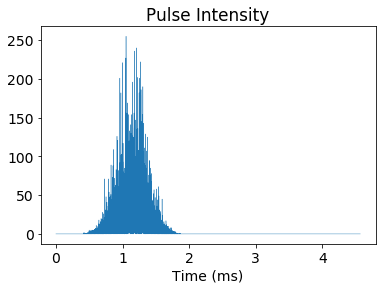

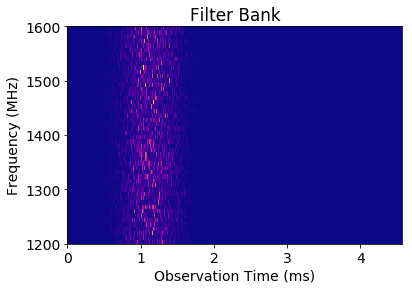

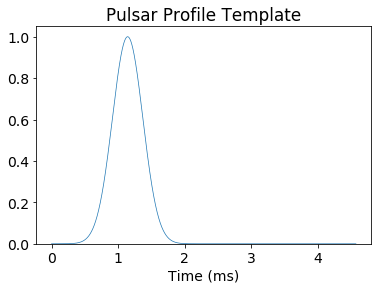

In [20]:
s1.signal.pulse_plot()
s1.signal.filter_bank()
s1.signal.profile_plot()

### Adding in ism and scint classes

The way to add the ism and scint classes is to change `sim_ism` and `sim_scint` to True. By doing this the simulator knows to initialize those classes when it is called. These classes require a few more parameters to run. What needs to be added is shown below.

In [8]:
test_dict['tau_scatter'] =6e-08
test_dict['to_DM_Broaden'] = False

Now you can run another simulation, and change `sim_ism` and `sim_scint` to True to see the changes these classes make.

In [9]:
s2 =  PSS.Simulation(psr =  'J1713+0747' , sim_telescope= 'GBT',sim_ism= True, sim_scint= True, sim_dict = test_dict,)

INFO: Using ICRS equatorial coordinate. The parameter KOM is measured respect to equatorial North. [pint.models.binary_ddk]
Five warnings should appear. Warnings that are normal are: Unrecognized parfile line "SOLARN0", "T2CMETHOD", "MODE", "INFO -f". Warning about "DDK model" is also normal.  
Central Frequency decorrelation Bandwidth =  15.6  MHz


100% dispersed in 0.786 seconds.

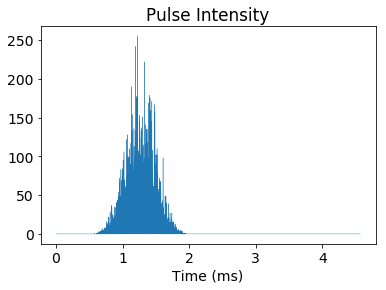

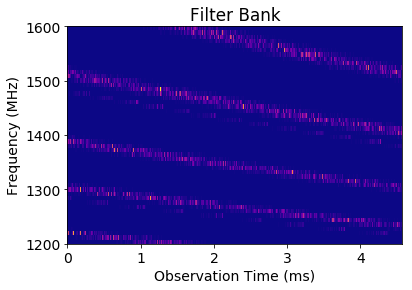

In [10]:
s2.simulate()
s2.signal.pulse_plot()
s2.signal.filter_bank()

## Using the simulator with no pulsar name

The simulator can also be used without the input of a pulsr name. Though, this requires a few parameters to be added to the dictionary. When a pulsar name is inputfour parameters (F0,dm,scint_bw, scint_timescale) are retrieved from a few data files. These parameters now need to be added to the dictionary.

In [11]:
test_dict['F0'] = 218
test_dict['dm'] = 15.91731
test_dict['scint_bw'] =  15.6
test_dict['scint_timescale'] = 2630

Now that the parameter dictionary is updated we can call the simulator again. This time `psr` will be changed to None since the four above parameters were added to the dictionary. `sim_ism` and `sim_scint` are also changed to None since these inputs are only called when a pulsar name is given.

In [12]:
s3 =  PSS.Simulation(psr =  None , sim_telescope= 'GBT',sim_ism= None, sim_scint= None, sim_dict = test_dict,)

Now that the simulator has been called the classes need to be initialzed. When a pulsar name in an input this is done automatically. However, when a pulsar name is not given this need to be done manually. The signal class and pulsar class need to be initialized for evry simulation.

In [13]:
s3.init_signal()
s3.init_pulsar()

The other three classes (ism, scint, and telescope) are optional and can be added or removed based on the goals of the simulation. They can be added using their inialization functions, as shown below.

In [14]:
s3.init_ism()
s3.init_telescope()

Once all of the desired classes are initialized, the simulation needs to be finalized using the simulate command.

In [15]:
s3.simulate()

100% dispersed in 0.539 seconds.

Now that the simulation is complete, a pulse plot and filter bank plot can be shown.

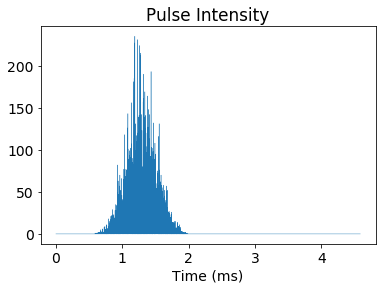

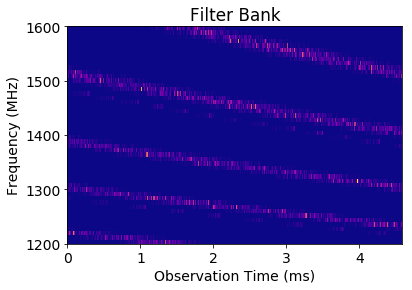

In [16]:
s3.signal.pulse_plot()
s3.signal.filter_bank()

These plot functions can be adjusted to show more than one pulse. This can be done by adding in the number of pulses you want to see into the function input.

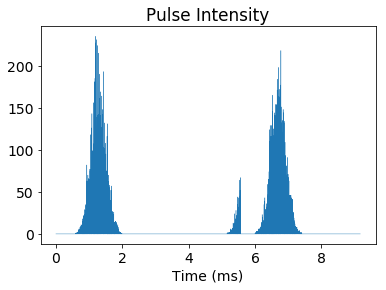

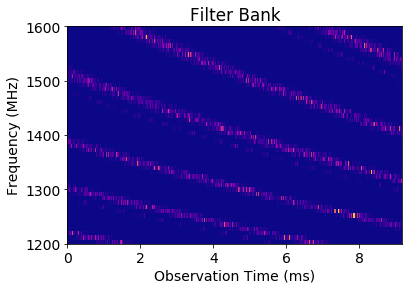

In [17]:
s3.signal.pulse_plot(N_pulses=2)
s3.signal.filter_bank(N_pulses = 2)

# Using get_pint_models()

This is a function that retrives parameters from a par file of a given pulsar. To use the fucntion a pulsar name and file path to where the file is located is needed as input. Once the function is called, the different parameters are stored as attributes.

Change the path below to be a path to a parfile on your machine, then run the cell.

When this command runs a few warnings should pop up. This is normal for the command and it does not mean the command did not work. 

In [18]:
path ='/Users/MYK/Desktop/psrsigsim/VersionZeroPointZero/psrsigsim/data/'
p = PSS.PSS_utils.get_pint_models(psr_name= 'J1713+0747', psr_file_path= path)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/MYK/Desktop/psrsigsim/VersionZeroPointZero/psrsigsim/data/J1713+0747_NANOGrav_11yv1.gls.par'

Once the function has run the values and units of the parameters can be retrieved. By using the variable name, the dersired parameter, and value, a specfic value can be retrieved.

In [ ]:
p.DM.value

The units of a paramater can also be retrieved. This is done by changing 'value' to 'units'.

In [ ]:
p.DM.units